In [1]:
import time
import pyupbit
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# backtest & bestK

def volatility(df, k):
    """변동성 돌파 전략"""
    df['range'] = (df['high'] - df['low']) * k
    df['target'] = df['open'] + df['range'].shift(1)
    df['ror'] = np.where(df['high'] > df['target'],
                df['close'] / df['target'] - 0.001,
                1)
    df['crr'] = df['ror'].cumprod() # cumulative return rate
    df['dr'] = df['close'] / df['open'] # daily return rate
    df['cdr'] = df['dr'].cumprod() # cumulative daily return rate
    df['mdd'] = (df['crr'].cummax() - df['crr']) / df['crr'].cummax() * 100 # 가장 높은 손익에서 최악의 손익을 뼴: mdd
#     df = df.dropna(axis=0)

    return df

def visualize_return_rate(df, name):
    """전략 적용&미적용 수익률 그래프"""
    plt.figure(figsize = (20, 8))
    plt.plot(df.index, df['crr']*100, color = 'g', label = name)
    plt.plot(df.index, df['cdr']*100, color = 'k', linestyle = '--')
    plt.legend(loc='best')
    plt.title(f"{name} mdd: {round(df['mdd'].max(), 2)} return_rate: {round(df['crr'].iloc[-1] * 100 - 100, 2)}%")
    plt.ylabel("rate of return")
    plt.grid(True)
    
def compare_k(df):
    """k값 비교"""
    for k in np.arange(0.1, 0.7, 0.1):
        yield (volatility(df, k), k)
        
def print_compare_k(df):
    """비교 k 값 출력"""
    for df, k in compare_k(df):
        print(round(k, 1)," : ", df['crr'].iloc[-1] * 100)

0.1  :  165.90450414903447
0.2  :  164.5600944801265
0.3  :  143.07976378250004
0.4  :  133.4209221477806
0.5  :  122.7060166998903
0.6  :  113.01274839546312


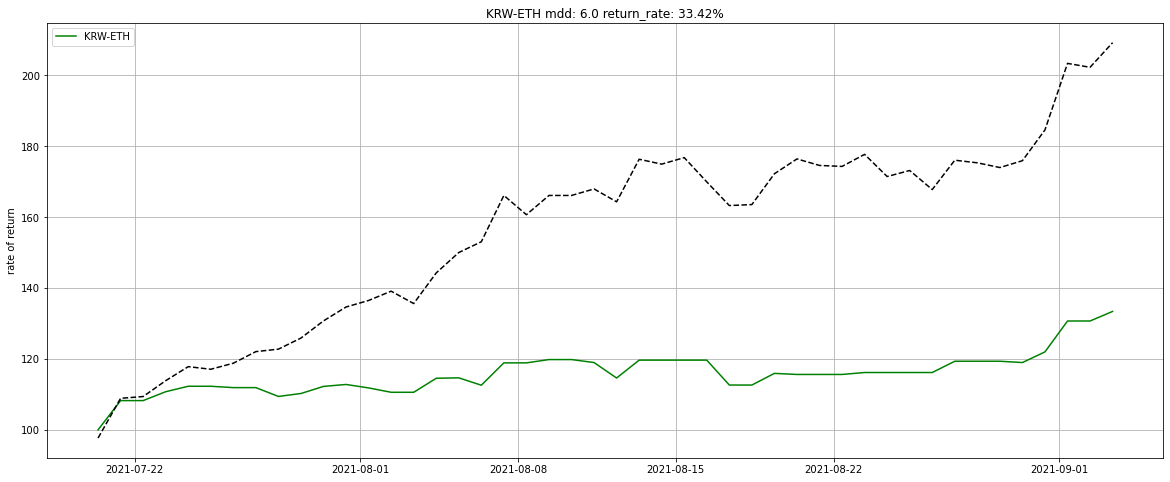

In [3]:
# 상승장 2021-07-20 ~ 2021-09-04  (k = 0.4)
rise_df = pyupbit.get_ohlcv("KRW-ETH", to="2021-09-04", count=46)

rise_df = volatility(rise_df, 0.4)

visualize_return_rate(rise_df, "KRW-ETH")

print_compare_k(rise_df) 

0.1  :  48.85622953584551
0.2  :  74.70781634200966
0.3  :  100.04764312518905
0.4  :  88.34541059507386
0.5  :  89.0264806427672
0.6  :  95.8860179615922


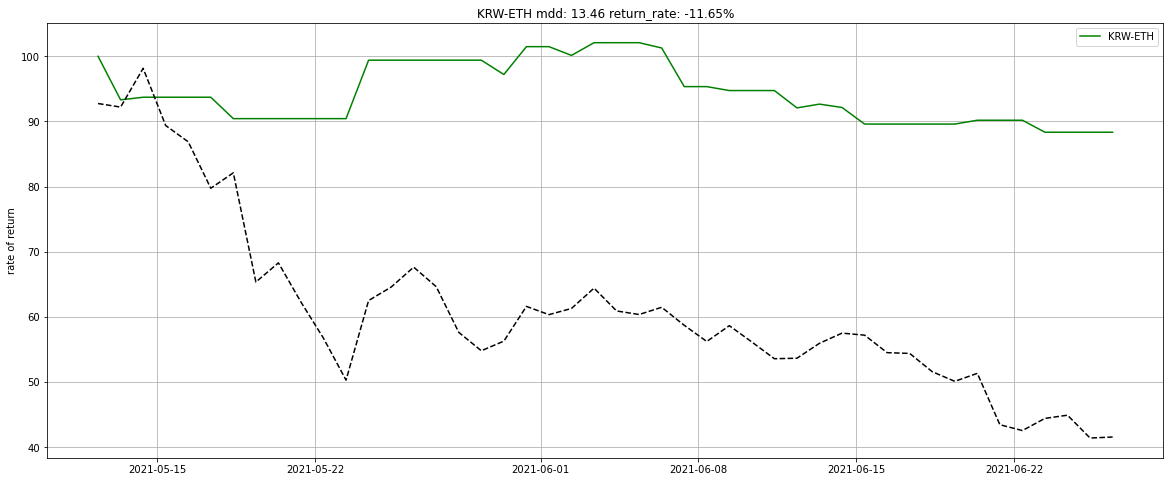

In [4]:
# 하락장 2021-5-11 ~ 2021-6-26

drop_df = pyupbit.get_ohlcv("KRW-ETH", to="2021-06-27", count=46)

drop_df = volatility(drop_df, 0.4)

visualize_return_rate(drop_df, "KRW-ETH")

print_compare_k(drop_df) 

0.1  :  85.15955868743542
0.2  :  93.77678856275374
0.3  :  95.4413800751364
0.4  :  105.54380965731167
0.5  :  105.85508548908862
0.6  :  105.34901818505837


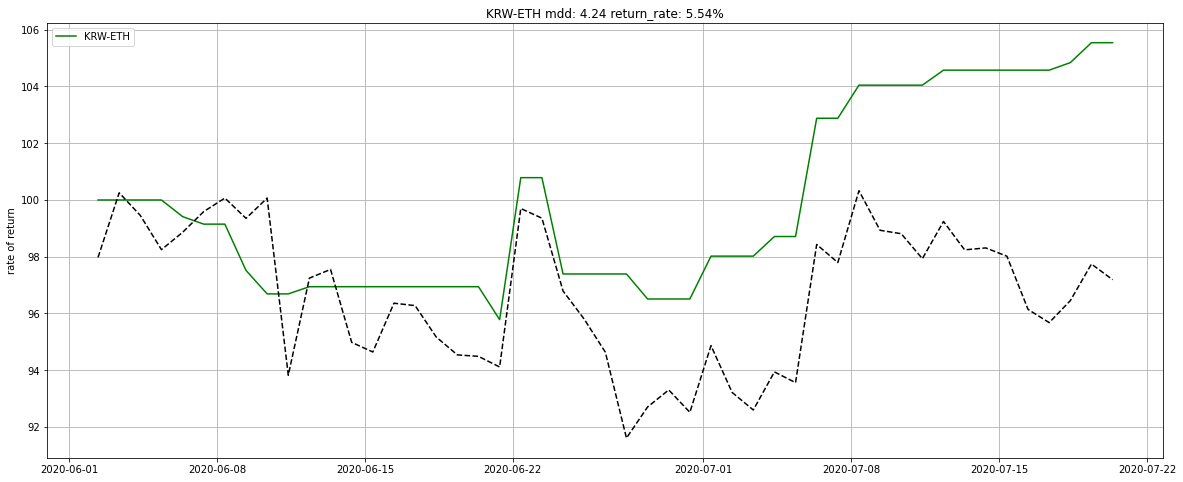

In [5]:
# 횡보장 2021-06-01 ~ 2021-07-20
sideway_df = pyupbit.get_ohlcv("KRW-ETH", to="2020-07-21", count=49)

sideway_df = volatility(sideway_df, 0.4)

visualize_return_rate(sideway_df, "KRW-ETH")

print_compare_k(sideway_df) 

0.1  :  81.25852841169106
0.2  :  104.95507848235266
0.3  :  115.39930787024899
0.4  :  104.87839728109304
0.5  :  114.02708121089933
0.6  :  119.17955301164544


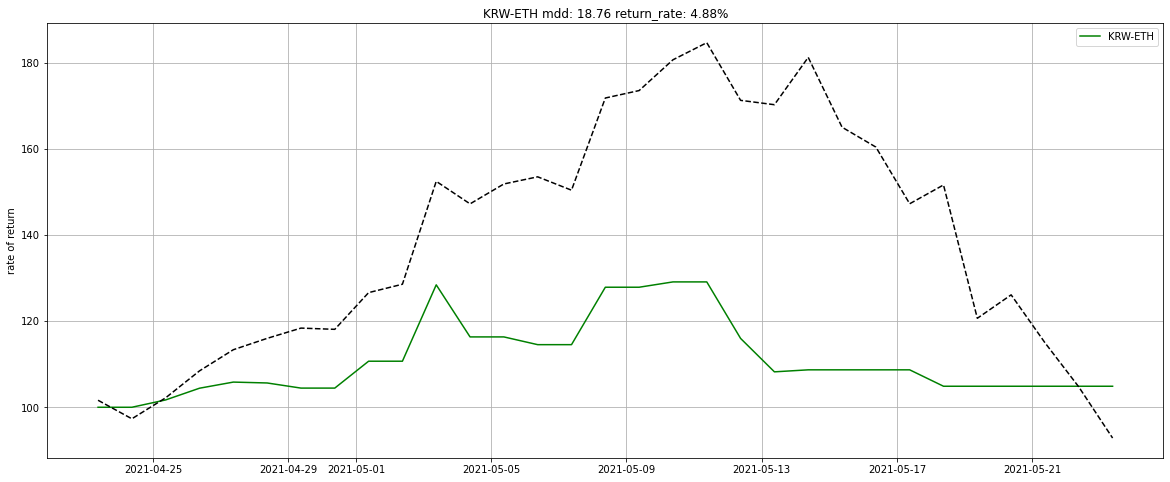

In [6]:
# 변동장 2021-04-23 ~ 2021-05-23

fluctuate_df = pyupbit.get_ohlcv("KRW-ETH", to="2021-05-24", count=31)

fluctuate_df = volatility(fluctuate_df, 0.4)

visualize_return_rate(fluctuate_df, "KRW-ETH")

print_compare_k(fluctuate_df) 